In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
housing_df = pd.read_csv('California_housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing_df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [13]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
# As the number of nulls are very small as compared to the total number of data (appx. 1%) so we can drop the rows with null values
housing_df.dropna(inplace=True)
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: >

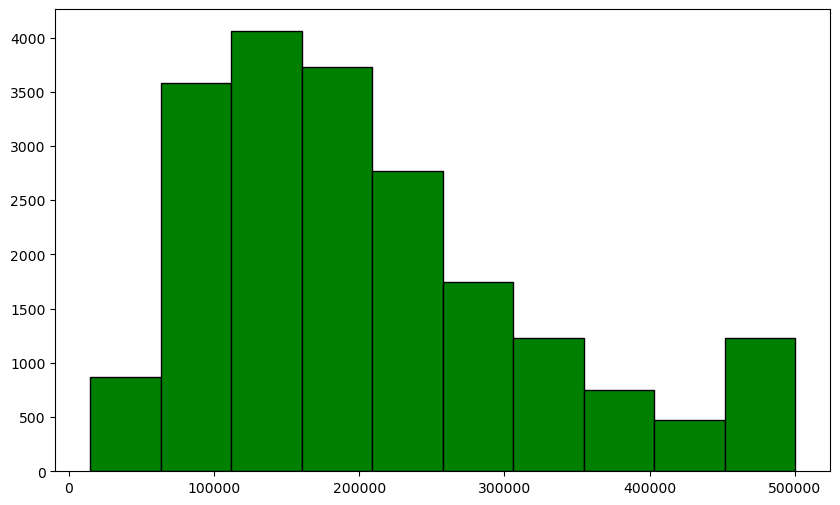

In [19]:
plt.figure(figsize=(10,6))
housing_df['median_house_value'].hist(edgecolor='black', grid=False, color='green')

In [21]:
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [23]:
pd.get_dummies(housing_df['ocean_proximity'], dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


# Creating Checkpoint

In [26]:
housing_copy = housing_df.copy()

# Joining Data

In [29]:
housing_df.join(pd.get_dummies(housing_df['ocean_proximity'], dtype=int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

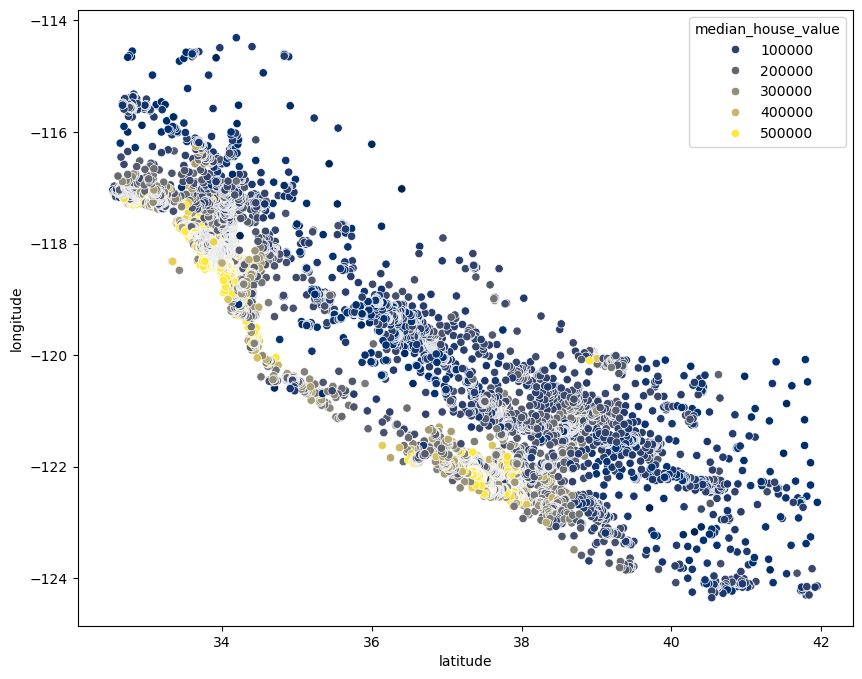

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=housing_df, x= 'latitude', y = 'longitude', hue='median_house_value', palette='cividis')

# Scaling the data with log transformation

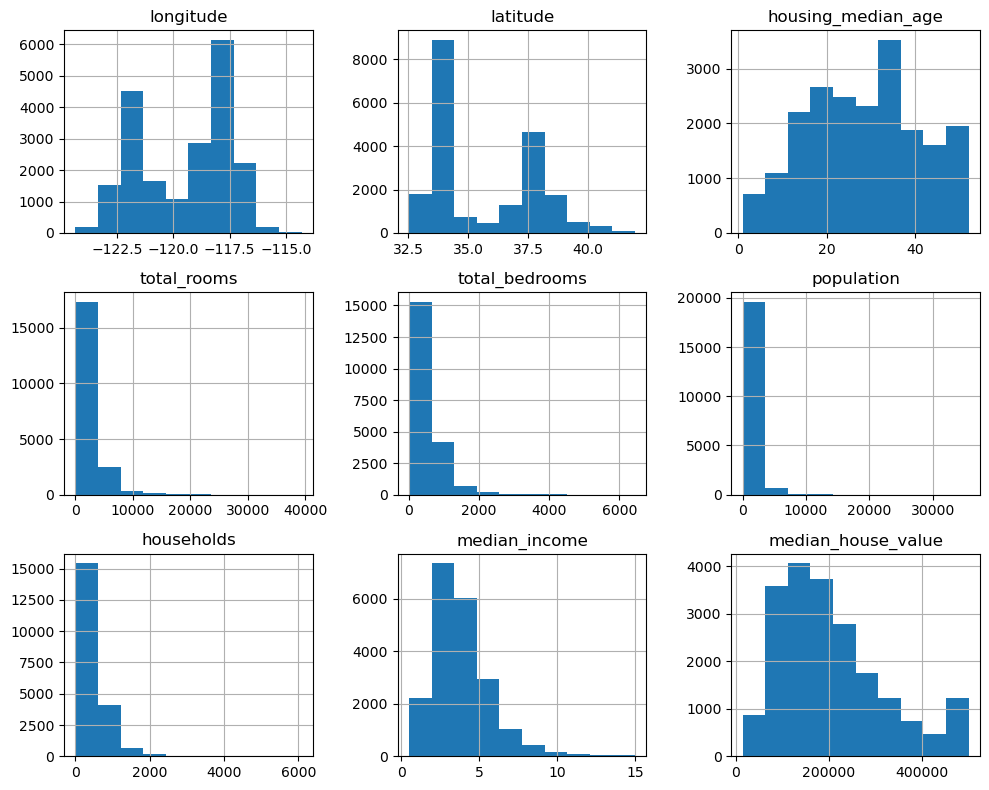

In [34]:
housing_df.hist(figsize=(10,8))
plt.tight_layout()

In [36]:
housing_df['total_bedrooms']=np.log(housing_df['total_bedrooms'] + 1)
housing_df['total_rooms']=np.log(housing_df['total_rooms'] + 1)
housing_df['population']=np.log(housing_df['population'] + 1)
housing_df['households']=np.log(housing_df['households'] + 1)

In [38]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,INLAND


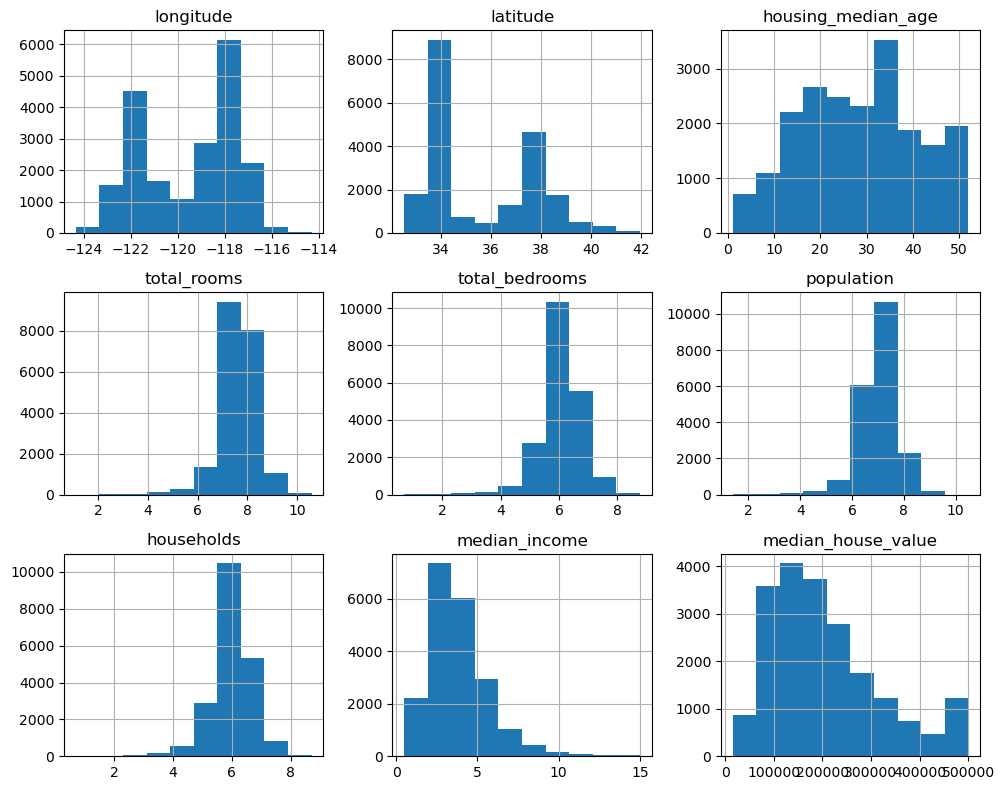

In [41]:
housing_df.hist(figsize=(10,8))
plt.tight_layout()

# Feature Engineering

In [44]:
housing_df['avg_rooms_per_house']= housing_df['total_rooms']/housing_df['households']
housing_df['bedroom_ratio']=housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_house,bedroom_ratio
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY,1.399834,0.717813
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY,1.260013,0.790429
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY,1.407171,0.720313
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY,1.325768,0.764097
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY,1.329892,0.762444
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,INLAND,1.278530,0.798973
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,INLAND,1.380045,0.766205
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,INLAND,1.271340,0.801228
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,INLAND,1.285243,0.799078


In [46]:
housing_df.drop('ocean_proximity', axis=1, inplace=True)

In [50]:
housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms_per_house,bedroom_ratio
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,-0.067385,0.097555
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,0.140709,-0.113840
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,-0.037070,-0.034734
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,-0.370189,0.413025
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,-0.544786,0.676798
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,-0.617203,0.576463
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,-0.649592,0.637891
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.333041,-0.511493
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.114094,-0.198690
avg_rooms_per_house,-0.067385,0.140709,-0.037070,-0.370189,-0.544786,-0.617203,-0.649592,0.333041,0.114094,1.000000,-0.740848


<Axes: >

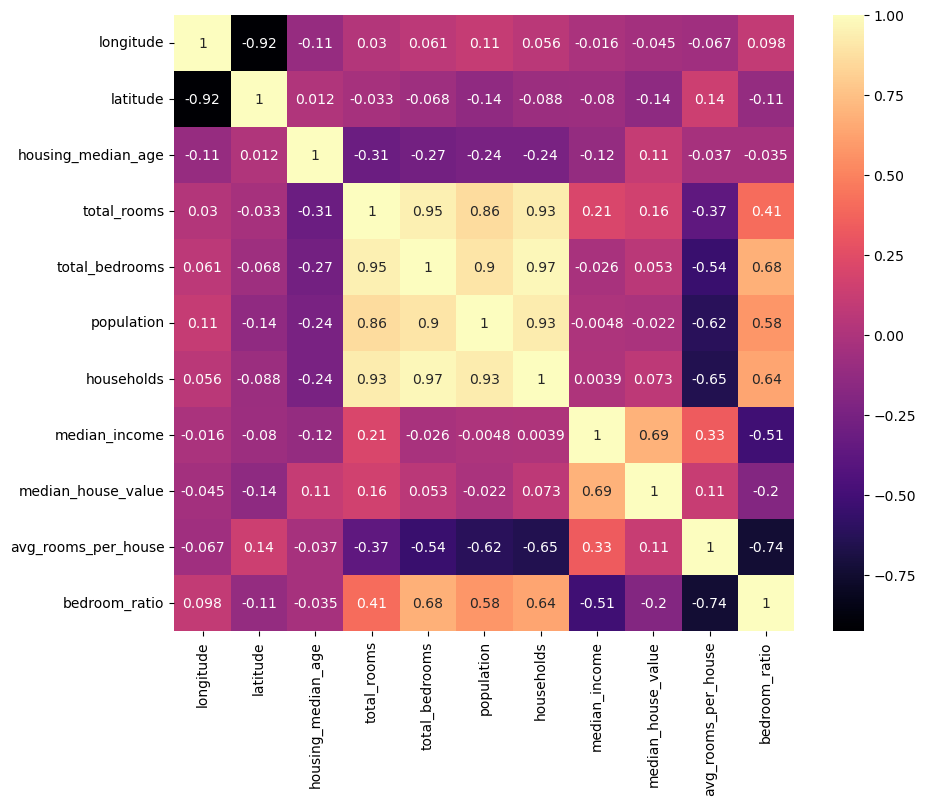

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), cmap ='magma', annot = True)

# Training the Regression Model

In [54]:
x = housing_df.drop(columns= ['median_house_value'])

In [56]:
y = housing_df['median_house_value']

In [58]:
x , y

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0        -122.23     37.88                41.0     6.781058        4.867534   
 1        -122.22     37.86                21.0     8.867850        7.009409   
 2        -122.24     37.85                52.0     7.291656        5.252273   
 3        -122.25     37.85                52.0     7.150701        5.463832   
 4        -122.25     37.85                52.0     7.395108        5.638355   
 ...          ...       ...                 ...          ...             ...   
 20635    -121.09     39.48                25.0     7.418181        5.926926   
 20636    -121.21     39.49                18.0     6.548219        5.017280   
 20637    -121.22     39.43                17.0     7.720905        6.186209   
 20638    -121.32     39.43                18.0     7.528869        6.016157   
 20639    -121.24     39.37                16.0     7.932362        6.424869   
 
        population  households  median

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
model = LinearRegression()

In [69]:
model.fit(x_train, y_train)

LinearRegression()

In [71]:
model.score(x_test, y_test)

0.6636611438865947

# OR

In [74]:
y_pred = model.predict(x_test)

In [76]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.6636611438865947

# Mean squared value

In [79]:
from sklearn.metrics import mean_squared_error

In [81]:
mse = mean_squared_error(y_test, y_pred)

In [83]:
mse

4599494662.723638

In [85]:
np.sqrt(mse)

67819.57433310561

In [87]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms_per_house,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.629543,6.054708,7.025121,5.984538,3.871162,206864.413155,1.281093,0.792096
std,2.003578,2.136348,12.591805,0.750260,0.726728,0.736336,0.726856,1.899291,115435.667099,0.078811,0.036717
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,14999.000000,0.941589,0.315465
25%,-121.800000,33.930000,18.000000,7.280008,5.693732,6.669498,5.638355,2.563700,119500.000000,1.241671,0.771585
50%,-118.490000,34.260000,29.000000,7.662938,6.077642,7.062192,6.016157,3.536500,179700.000000,1.274007,0.792726
75%,-118.010000,37.720000,37.000000,8.053251,6.473891,7.451822,6.405228,4.744000,264700.000000,1.307734,0.813899
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,15.000100,500001.000000,3.560877,1.000000


# Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
model_forest = RandomForestRegressor()

In [98]:
model_forest.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
model_forest.score(x_test, y_test)

0.8085787490907449

In [104]:
y_pred_for = model_forest.predict(x_test)
mse_forest = mean_squared_error(y_test, y_pred_for)
print("Mean Squared Error", mse_forest)

Mean Squared Error 2617720212.4756513


In [106]:
np.sqrt(2617720212.4756513)

51163.6610542644

# Feature Importance

In [109]:
feature_names=x_train.columns
feature_importance = model_forest.feature_importances_

In [111]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

In [137]:
feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
7,median_income,0.522669
0,longitude,0.129074
1,latitude,0.116315
2,housing_median_age,0.066025
9,bedroom_ratio,0.045912
8,avg_rooms_per_house,0.037063
5,population,0.032577
3,total_rooms,0.020090
4,total_bedrooms,0.015609
6,households,0.014665


Text(0.5, 1.0, 'Features Importance in Model')

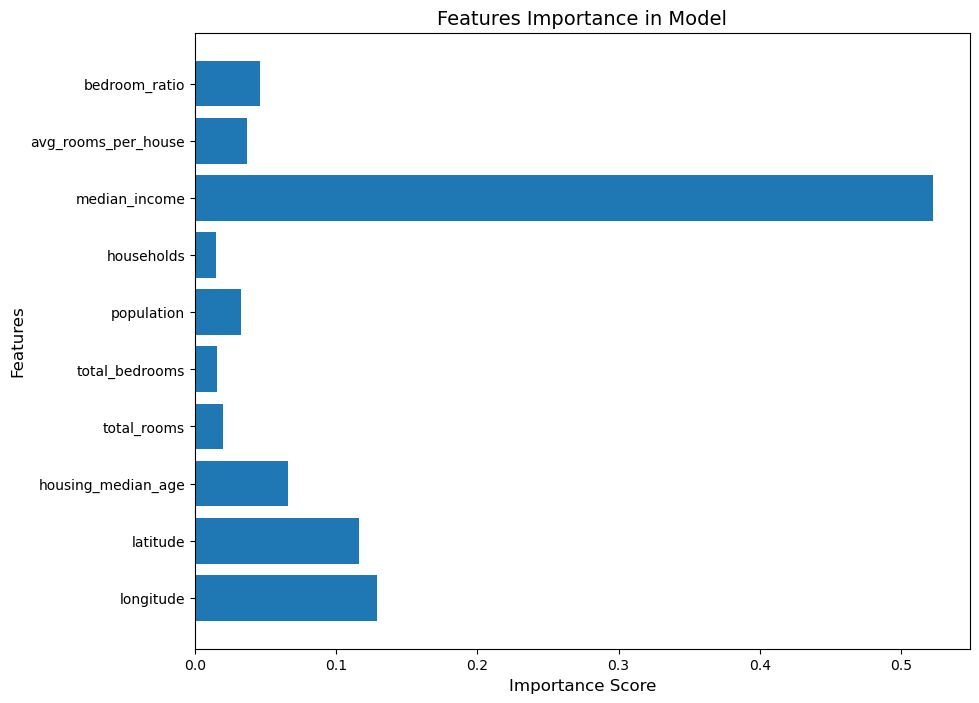

In [145]:
plt.figure(figsize=(10,8))
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'])

plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Features Importance in Model', fontsize=14)